# Neural Networks implementation on IRIS data using TensorFlow

## Iris Dataset Overview

The Iris dataset is one of the most well-known datasets in the field of machine learning and statistics. It was introduced by the British biologist and statistician Ronald A. Fisher in 1936 as part of his work on discriminant analysis. The dataset contains measurements of different parts of iris flowers, and it has been widely used for testing machine learning algorithms.


**Dataset Description**:
The Iris dataset consists of 150 samples from three species of Iris flowers:

- Setosa (class 0)
- Versicolor (class 1)
- Virginica (class 2)

For each species, there are 50 samples, and each sample has four features:
- Sepal Length (cm)
- Sepal Width (cm)
- Petal Length (cm)
- Petal Width (cm)
These four features are numeric, and the target variable is the species of the Iris flower, which is categorical (i.e., it has three distinct classes).

**Key Points of the Iris Dataset**:
- Number of Instances: 150
- Number of Features: 4 continuous features (sepal length, sepal width, petal length, petal width)
- Number of Classes: 3 (Setosa, Versicolor, Virginica)
- Attribute Types: All attributes are numeric (continuous).

**Goal**:
The main objective of using the Iris dataset in machine learning is to classify flowers into one of the three species based on the measurements of the sepal and petal dimensions.



## Importing libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import matplotlib.pyplot as plt

## Loading the dataset

In [3]:
# Load Iris dataset
from sklearn.datasets import load_iris
data = load_iris()

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['species'] = data.target

# Display first few rows
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


## Pre-processing Data

### Split the dataset into training and testing sets

### Normalize the feature columns: 

 involves adjusting the range of numerical features so that they are on a similar scale. This is especially important when features have different units of measurement, as is the case in the Iris dataset (e.g., petal length in cm vs. petal width in cm).

### One-hot encode the target variable:

The target variable in the Iris dataset is categorical, representing three species of Iris flowers: Setosa, Versicolor, and Virginica. Machine learning algorithms typically require numerical inputs, so categorical variables need to be converted to numerical format.

One-Hot Encoding is a popular method for encoding categorical variables. It involves converting each class label into a binary vector, where each class is represented by a column. For a three-class target like the Iris dataset, one-hot encoding creates three binary columns corresponding to the three species.
Example:

Setosa: [1, 0, 0]

Versicolor: [0, 1, 0]

Virginica: [0, 0, 1]

**Why is one-hot encoding important?**
Machine Learning Compatibility: Most machine learning models (e.g., neural networks, logistic regression) expect numerical input, and categorical data must be transformed into a suitable format. One-hot encoding creates binary vectors that can be directly fed into these models.
Avoiding Ordinal Relationship Assumptions: Encoding categorical variables as integers (e.g., 0, 1, 2) could imply an ordinal relationship (i.e., the model might mistakenly interpret "Versicolor" as being closer to "Setosa" than "Virginica"). One-hot encoding avoids this by treating the categories as independent.

In [4]:
# Features and target
X = df.drop('species', axis=1)
y = df['species']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature columns
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

# One-hot encode the target variable
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# Convert target variable to one-hot encoded vectors
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=3)

## Ways to Build Neural Networks in Keras: Sequential API vs Functional API

In Keras, there are two main ways to build neural networks: the Sequential API and the Functional API.

**Sequential API:** This is the simplest way to build a model. It works well for models where layers are stacked one after another in a linear fashion. Each layer has a single input and output, making it ideal for basic feedforward neural networks.

**Functional API:** This provides more flexibility, allowing the creation of models with complex architectures, such as models with multiple inputs, outputs, or shared layers. It supports non-linear connections, making it suitable for advanced models like multi-input systems or those with skip connections.

**When to use:**

Use the Sequential API for simple, linear models.
Use the Functional API for more complex models with branching or multiple inputs/outputs.


## Model building
We'll use sequential API tp build a feed-forward network here.

In this code, we are defining a simple feed-forward neural network for multi-class classification using TensorFlow and Keras. The network consists of three layers: an input layer, a hidden layer, and an output layer. Let's break down each component:

1) Input Layer
    - input_shape=(X_train.shape[1],): This parameter specifies the shape of the input data. It is set to the number of features (columns) in the training dataset X_train. The shape is (X_train.shape[1],), where X_train.shape[1] gives the number of features (e.g., 4 for the Iris dataset, since it has four features: sepal length, sepal width, petal length, and petal width).
    - This layer does not contain any weights or activations—it just takes in the data and passes it to the next layer.

2) Hidden Layer
    - The hidden layer performs computations and helps the model learn the relationship between the features and the target variable.
    - 10: This specifies the number of neurons in the hidden layer. It determines how many outputs this layer will have. In this case, there are 10 neurons, which is a hyperparameter you can tune.
    - activation='relu': This is the ReLU (Rectified Linear Unit) activation function. ReLU is widely used because it introduces non-linearity to the model and helps it learn complex patterns. The ReLU function outputs the input directly if it is positive; otherwise, it outputs zero. There are other functions like tanh, sigmoid etc., 

3) Output Layer
    - The output layer produces the final predictions, mapping the hidden layer outputs to the class probabilities.
    - 3: This specifies the number of neurons in the output layer. In this case, there are 3 neurons corresponding to the 3 classes in the Iris dataset (Setosa, Versicolor, Virginica).
    - activation='softmax': The softmax activation function is used for multi-class classification problems. It converts the raw output scores (logits) into probabilities that sum to 1. Each output neuron corresponds to the probability of the input belonging to a particular class. The class with the highest probability is the model's prediction.

**Summary of Architecture:**

Input Layer: Takes in a vector with X_train.shape[1] features (4 for the Iris dataset).

Hidden Layer: 10 neurons, with ReLU activation, responsible for learning non-linear relationships.

Output Layer: 3 neurons, one for each class (Setosa, Versicolor, Virginica), using the softmax function to output class probabilities.

In [5]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),  # Input layer with shape matching number of features
    tf.keras.layers.Dense(10, activation='relu'),  # Hidden layer with 10 neurons and ReLU activation
    tf.keras.layers.Dense(3, activation='softmax')  # Output layer with 3 neurons (one for each class)
])


## Compile model

**Optimizer:**
    optimizer='adam': The Adam optimizer is a popular gradient-based optimization algorithm. It combines the advantages of both AdaGrad and RMSProp, adapting the learning rate for each parameter based on estimates of the first and second moments of the gradients. It generally works well for a wide range of problems and is easy to use without needing much tuning.

**Loss Function:**
    loss='categorical_crossentropy': This is the loss function used for multi-class classification. Categorical cross-entropy measures the difference between the true label distribution and the predicted label distribution. It is particularly useful when the target variable consists of one-hot encoded vectors.

**Metrics:**
    metrics=['accuracy']: The accuracy metric is used to evaluate the model’s performance. It computes the fraction of correctly predicted instances.

**model.summary():**
This function will output a summary of the model architecture, including the number of parameters in each layer, the total number of parameters in the model, and the shape of the output at each layer. This is useful for understanding how the model is structured and for verifying the number of trainable parameters.

In [6]:

# Compile the model
model.compile(optimizer='adam',  # Adam optimizer
              loss='categorical_crossentropy',  # Categorical cross-entropy for multi-class classification
              metrics=['accuracy'])  # Accuracy metric to evaluate performance

# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 3)                 33        
                                                                 
Total params: 83 (332.00 Byte)
Trainable params: 83 (332.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Training the model

Epoch 1/50
15/15 [==============================] - 0s 6ms/step - loss: 1.1423 - accuracy: 0.1083 - val_loss: 1.1047 - val_accuracy: 0.1000
Epoch 2/50
15/15 [==============================] - 0s 1ms/step - loss: 1.0804 - accuracy: 0.1500 - val_loss: 1.0462 - val_accuracy: 0.2000
Epoch 3/50
15/15 [==============================] - 0s 1ms/step - loss: 1.0261 - accuracy: 0.3083 - val_loss: 0.9906 - val_accuracy: 0.5000
Epoch 4/50
15/15 [==============================] - 0s 1ms/step - loss: 0.9761 - accuracy: 0.4917 - val_loss: 0.9381 - val_accuracy: 0.6667
Epoch 5/50
15/15 [==============================] - 0s 1ms/step - loss: 0.9283 - accuracy: 0.6583 - val_loss: 0.8896 - val_accuracy: 0.8333
Epoch 6/50
15/15 [==============================] - 0s 1ms/step - loss: 0.8815 - accuracy: 0.7750 - val_loss: 0.8423 - val_accuracy: 0.8667
Epoch 7/50
15/15 [==============================] - 0s 1ms/step - loss: 0.8364 - accuracy: 0.8250 - val_loss: 0.7970 - val_accuracy: 0.8667
Epoch 8/50
15/15 [==

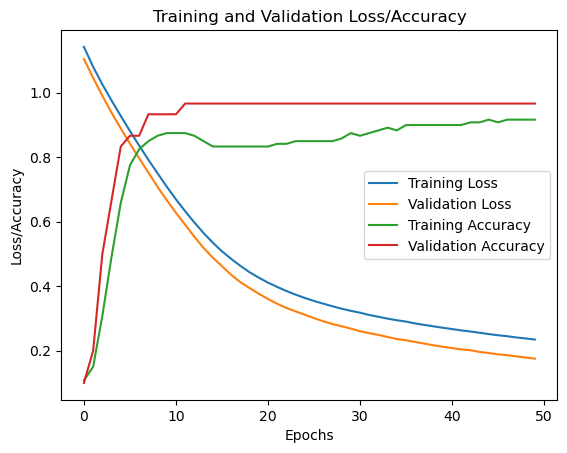

In [7]:
# Train the model
history = model.fit(X_train, y_train_one_hot, epochs=50, batch_size=8, validation_data=(X_test, y_test_one_hot))

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Loss/Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()


The graph shows a machine learning model with strong convergence over 50 epochs. Training and validation losses decrease steadily from 0.95 to 0.27 and 0.23, respectively. Both training and validation accuracy improve significantly, reaching over 0.90, with validation accuracy slightly outperforming training. The consistent decrease in loss and increase in accuracy suggests good generalization and model tuning.

## Model Evaluation

In [9]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test_one_hot)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


1/1 [==============================] - 0s 23ms/step - loss: 0.1752 - accuracy: 0.9667
Test Loss: 0.1752413809299469
Test Accuracy: 0.9666666388511658


## Making Predictions

In [10]:
# Predict on test data
predictions = model.predict(X_test)

# Convert predictions from one-hot encoding back to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Convert true labels from one-hot encoding to class labels
true_classes = np.argmax(y_test_one_hot, axis=1)

print("Predicted classes:", predicted_classes)
print("True classes:", true_classes)


1/1 [==============================] - 0s 54ms/step
Predicted classes: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
True classes: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
